<a href="https://colab.research.google.com/github/navneetkrc/Colab_fastai/blob/master/NLP/KGQA/Knowledge_graph_using_Spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install spacy

London is the capital and largest city of England and the United Kingdom. Standing on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea, London has been a major settlement for two millennia. Londinium was founded by the Romans. The City of London, London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as the Square Mile − retains boundaries that follow closely its medieval limits.The City of Westminster is also an Inner London borough holding city status. Greater London is governed by the Mayor of London and the London Assembly.London is located in the southeast of England.Westminster is located in London.London is the biggest city in Britain. London has a population of 7,172,036.
London -> nsubj
is -> ROOT
the -> det
capital -> attr
and -> cc
largest -> amod
city -> conj
of -> prep
England -> pobj
and -> cc
the -> det
United -> compound
Kingdom -> conj
. -> punct
London , be capital la

<Figure size 432x288 with 0 Axes>

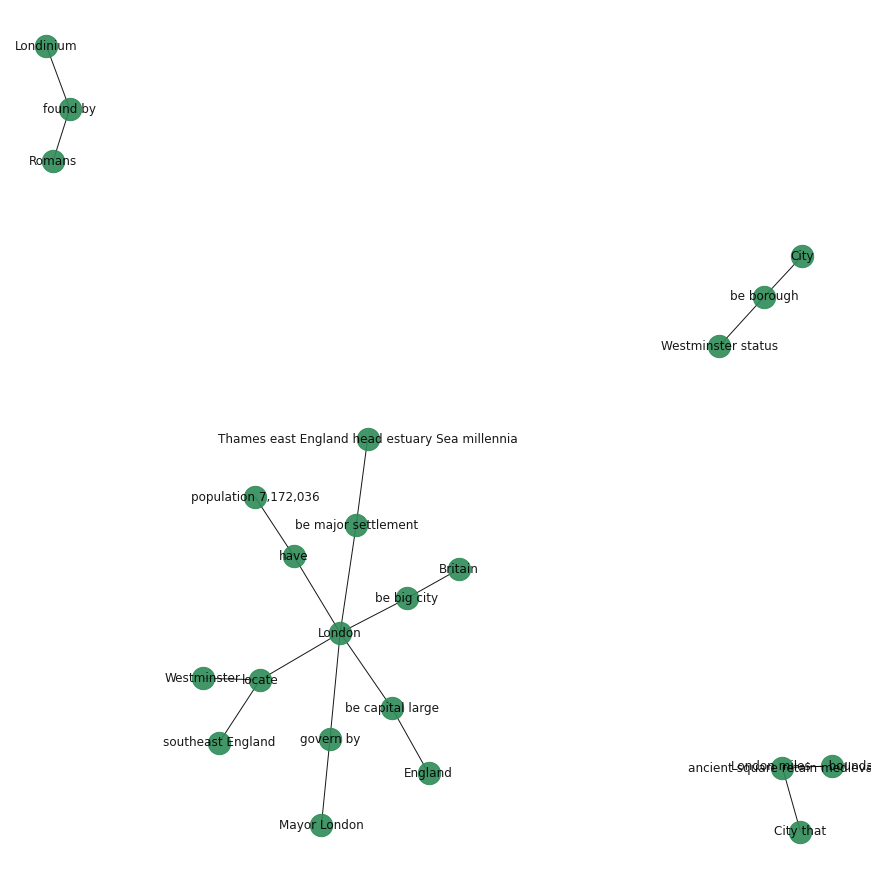

In [167]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    plt.figure(figsize=(12,12))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

if __name__ == "__main__":

    text = "London is the capital and largest city of England and the United Kingdom. Standing on the River " \
           "Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to " \
           "the North Sea, London has been a major settlement for two millennia. " \
           "Londinium was founded by the Romans. The City of London, " \
           "London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as " \
           "the Square Mile − retains boundaries that follow closely its medieval limits." \
           "The City of Westminster is also an Inner London borough holding city status. " \
           "Greater London is governed by the Mayor of London and the London Assembly." \
           "London is located in the southeast of England." \
           "Westminster is located in London." \
           "London is the biggest city in Britain. London has a population of 7,172,036."

    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_sm')

    triples = []
    print (text)
    for sentence in sentences:
        triples.append(processSentence(sentence))

    printGraph(triples)

In [171]:
    text2 = "Ram's father is Shyam. Shyam's father is Dashrath. Laxman is Ram's brother. Ram was married to Sita."\
        " Sita was kidnapped by Rawan. Hanuman, devotee of Lord Ram helped rescue Sita."\
        "Ram Kapoor is the founder, also called the father  of XYZ company. "\
        "He was born in 1999. XYZ basically focuses on the sale of electronic goods."

    sentences = getSentences(text2)
    nlp_model = spacy.load('en_core_web_sm')

    triples = []
    print (text2)
    for sentence in sentences:
        triples.append(processSentence(sentence))


Ram's father is Shyam. Shyam's father is Dashrath. Laxman is Ram's brother. Ram was married to Sita. Sita was kidnapped by Rawan. Hanuman, devotee of Lord Ram helped rescue Sita.Ram Kapoor is the founder, also called the father  of XYZ company. He was born in 1999. XYZ basically focuses on the sale of electronic goods.
Ram -> poss
's -> case
father -> nsubj
is -> ROOT
Shyam -> attr
. -> punct
father , be Shyam , 
Shyam -> poss
's -> case
father -> nsubj
is -> ROOT
Dashrath -> attr
. -> punct
father , be Dashrath , 
Laxman -> nsubj
is -> ROOT
Ram -> poss
's -> case
brother -> attr
. -> punct
Laxman , be brother , 
Ram -> nsubj
was -> ROOT
married -> acomp
to -> prep
Sita -> pobj
. -> punct
Ram , be , Sita
Sita -> nsubjpass
was -> auxpass
kidnapped -> ROOT
by -> agent
Rawan -> pobj
. -> punct
Sita , kidnap by , Rawan
Hanuman -> nsubj
, -> punct
devotee -> appos
of -> prep
Lord -> compound
Ram -> pobj
helped -> ROOT
rescue -> compound
Sita -> dobj
. -> punct
Hanuman , help , Ram Sita
Ram 

<Figure size 432x288 with 0 Axes>

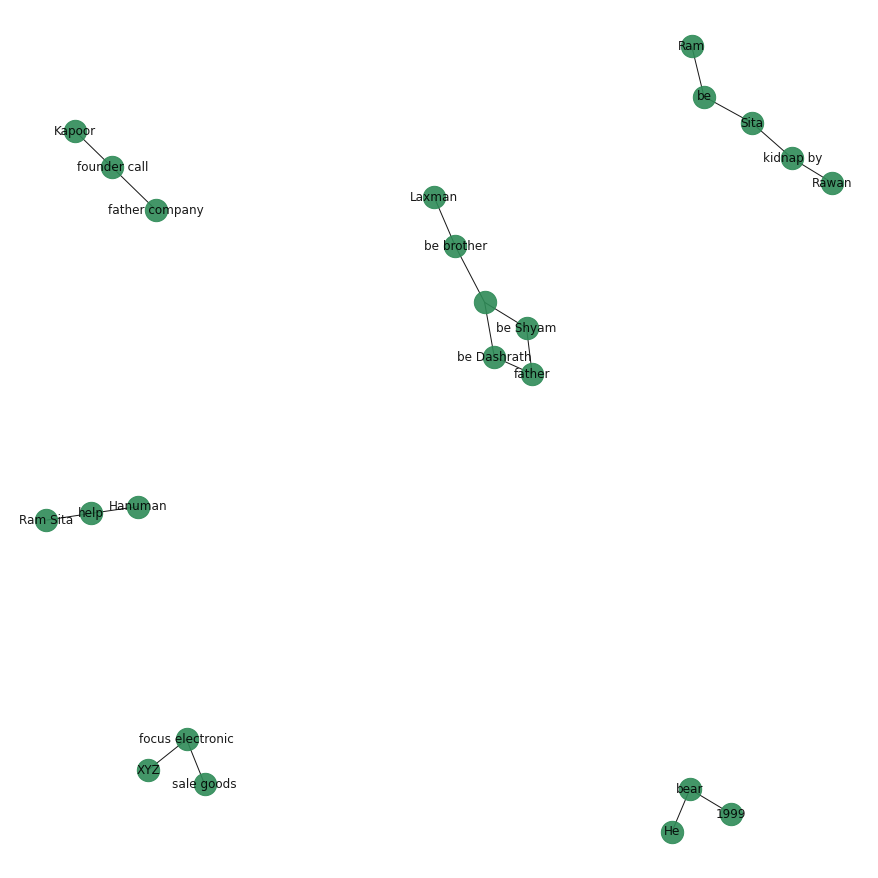

In [172]:
printGraph(triples)

In [10]:
triples

[('father', 'be Shyam', ''),
 ('father', 'be Dashrath', ''),
 ('Laxman', 'be brother', ''),
 ('Ram', 'be', 'Sita'),
 ('Sita', 'kidnap by', 'Rawan'),
 ('Hanuman', 'help', 'Ram Sita'),
 ('Kapoor', 'founder call', 'father company'),
 ('He', 'bear', '1999'),
 ('XYZ', 'focus electronic', 'sale goods')]

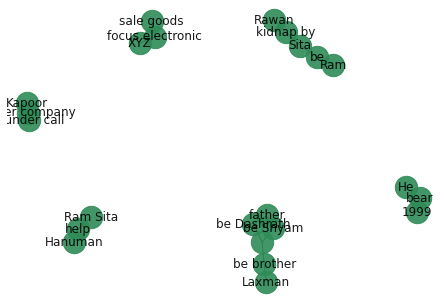

In [11]:
printGraph(triples)

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()